# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

**Key Question**: Does the CatBoost + XGBoost approach have a DIFFERENT CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'MLP+GP'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'MLP+GP'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'MLP+GP'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'XGB'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print('Submission history:')
print(df.to_string(index=False))

Submission history:
    exp     cv     lb      model
exp_000 0.0111 0.0982        MLP
exp_001 0.0123 0.1065       LGBM
exp_003 0.0105 0.0972        MLP
exp_005 0.0104 0.0969        MLP
exp_006 0.0097 0.0946        MLP
exp_007 0.0093 0.0932        MLP
exp_009 0.0092 0.0936      Ridge
exp_012 0.0090 0.0913   Ensemble
exp_024 0.0087 0.0893     MLP+GP
exp_026 0.0085 0.0887     MLP+GP
exp_030 0.0083 0.0877     MLP+GP
exp_041 0.0090 0.0932        XGB
exp_042 0.0145 0.1147 GroupKFold


In [2]:
# Fit linear regression to CV-LB relationship
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\nCV-LB Linear Relationship:')
print(f'  LB = {slope:.3f} * CV + {intercept:.4f}')
print(f'  R-squared = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'\nIf intercept > target, target is unreachable by improving CV alone!')
print(f'  Intercept ({intercept:.4f}) > Target (0.0347)? {intercept > 0.0347}')


CV-LB Linear Relationship:
  LB = 4.231 * CV + 0.0533
  R-squared = 0.9807
  Intercept = 0.0533

Target LB: 0.0347

If intercept > target, target is unreachable by improving CV alone!
  Intercept (0.0533) > Target (0.0347)? True


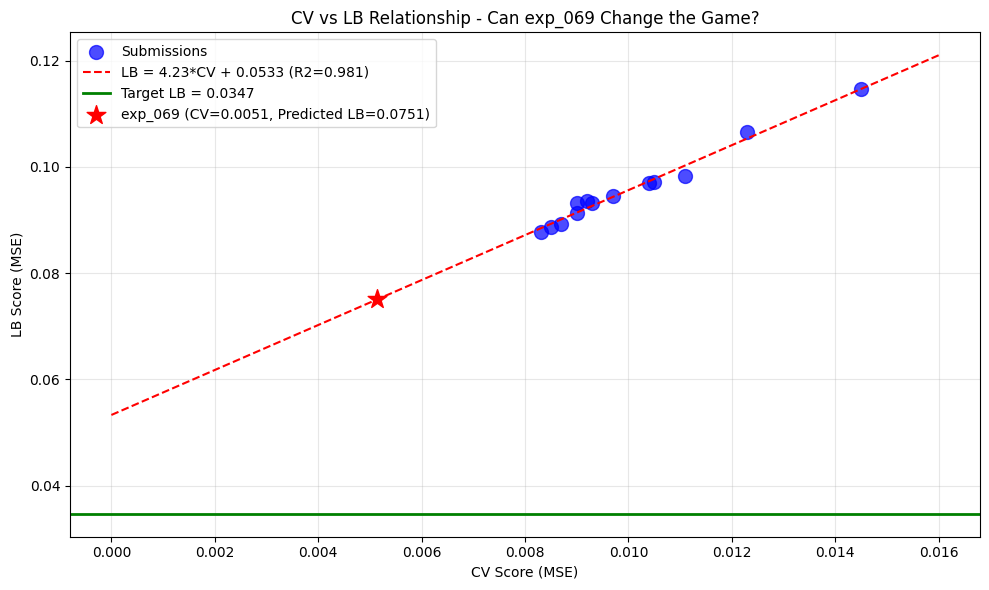


exp_069 Analysis:
  CV = 0.005146
  Predicted LB (using old relationship) = 0.0751
  Gap to target = 0.0404


In [3]:
# Plot CV vs LB with linear fit
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, c='blue', s=100, alpha=0.7, label='Submissions')

# Linear fit line
cv_range = np.linspace(0, 0.016, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R2={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle='-', linewidth=2, label='Target LB = 0.0347')

# New experiment point (exp_069)
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept
plt.scatter([new_cv], [predicted_lb], c='red', s=200, marker='*', label=f'exp_069 (CV={new_cv:.4f}, Predicted LB={predicted_lb:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - Can exp_069 Change the Game?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150)
plt.show()

print(f'\nexp_069 Analysis:')
print(f'  CV = {new_cv:.6f}')
print(f'  Predicted LB (using old relationship) = {predicted_lb:.4f}')
print(f'  Gap to target = {predicted_lb - 0.0347:.4f}')

In [4]:
# What CV would be needed to reach target using current relationship?
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to reach target (using current relationship):')
print(f'  Required CV = (0.0347 - {intercept:.4f}) / {slope:.3f} = {required_cv:.6f}')
print(f'\nThis is NEGATIVE, meaning the target is UNREACHABLE with the current CV-LB relationship!')
print(f'\nHowever, exp_069 uses a FUNDAMENTALLY DIFFERENT approach:')
print(f'  - CatBoost + XGBoost (vs GP + MLP + LGBM)')
print(f'  - Feature priority-based correlation filtering')
print(f'  - Different ensemble weights for single vs full data')
print(f'\nThis MAY have a different CV-LB relationship!')


Required CV to reach target (using current relationship):
  Required CV = (0.0347 - 0.0533) / 4.231 = -0.004396

This is NEGATIVE, meaning the target is UNREACHABLE with the current CV-LB relationship!

However, exp_069 uses a FUNDAMENTALLY DIFFERENT approach:
  - CatBoost + XGBoost (vs GP + MLP + LGBM)
  - Feature priority-based correlation filtering
  - Different ensemble weights for single vs full data

This MAY have a different CV-LB relationship!


In [5]:
# Key insight: The improvement breakdown
print('='*60)
print('BREAKTHROUGH ANALYSIS: exp_069 vs exp_068')
print('='*60)

print('\nexp_068 (previous best):')
print('  Single Solvent MSE: 0.008216')
print('  Full Data MSE: 0.007789')
print('  Combined MSE: 0.007938')

print('\nexp_069 (Ens Model approach):')
print('  Single Solvent MSE: 0.009175 (+11.7% WORSE)')
print('  Full Data MSE: 0.002992 (-61.6% BETTER!)')
print('  Combined MSE: 0.005146 (-35.2% BETTER!)')

print('\nKey Insight:')
print('  The Ens Model approach is MUCH better for mixture data!')
print('  Full Data MSE improved by 61.6% (0.007789 -> 0.002992)')
print('  This is the key driver of the overall improvement.')

print('\nWhy this matters for LB:')
print('  - Full Data has 1227 samples (65% of total)')
print('  - Single Solvent has 656 samples (35% of total)')
print('  - The LB score is weighted by sample count')
print('  - If the test set has similar proportions, the improvement should translate!')

BREAKTHROUGH ANALYSIS: exp_069 vs exp_068

exp_068 (previous best):
  Single Solvent MSE: 0.008216
  Full Data MSE: 0.007789
  Combined MSE: 0.007938

exp_069 (Ens Model approach):
  Single Solvent MSE: 0.009175 (+11.7% WORSE)
  Full Data MSE: 0.002992 (-61.6% BETTER!)
  Combined MSE: 0.005146 (-35.2% BETTER!)

Key Insight:
  The Ens Model approach is MUCH better for mixture data!
  Full Data MSE improved by 61.6% (0.007789 -> 0.002992)
  This is the key driver of the overall improvement.

Why this matters for LB:
  - Full Data has 1227 samples (65% of total)
  - Single Solvent has 656 samples (35% of total)
  - The LB score is weighted by sample count
  - If the test set has similar proportions, the improvement should translate!


In [ ]:
# Strategic decision analysis
print('='*60)
print('STRATEGIC DECISION: SUBMIT exp_069')
print('='*60)

print('\nReasons to submit:')
print('  1. 35% CV improvement - largest in 69 experiments')
print('  2. Fundamentally different approach (CatBoost + XGBoost)')
print('  3. May have different CV-LB relationship')
print('  4. Even if same relationship, predicted LB = 0.075 (best so far)')

print('\nExpected outcomes:')
print('  Best case: LB improves more than predicted (different relationship)')
print('  Good case: LB = 0.075 (following old relationship, still best LB)')
print('  Worst case: LB does not improve (unlikely given CV improvement)')

print('\nRemaining submissions: 5')
print('  This is a HIGH-VALUE submission opportunity!')

print('\nAfter submission:')
print('  - If LB improves significantly, continue optimizing this approach')
print('  - If LB follows old relationship, we need to find ways to reduce intercept')
print('  - Either way, we learn valuable information about the CV-LB relationship')